In [208]:
import pandas as pd
import os
import numpy as np
import sympy as sp
from sympy import *
init_printing()
dataset = pd.read_csv('datamerged2.csv')

The game just consists of a series of offers and the response to those offers.  The offer, out of 55 is in the `value` field below.  If the responser accepted it, the corresponding entry in `resp` will be 1.

There were three rounds of experiments in 2006, 2010 and 2014.  The experiment is given in the `old` column, with 0 meaning 2014, 1 is 2010 and 2 is 2014.

There were 4 treatments in which lower bounds were imposed on the offers proposers were allowed to make treatment 1 means no floor at all, 2 means a floor of 10 dollars, 3 means a floor of of 2 dollars, 4 means a floor of 5 dollars. 

In [49]:
t1 = dataset.treatment == 1
treatment1=dataset[t1]

t2 = dataset.treatment == 2
treatment2=dataset[t2]

t3 = dataset.treatment == 3
treatment3=dataset[t3]

t4 = dataset.treatment == 4
treatment4=dataset[t4]

Excluding round 1

In [54]:
subset1 = treatment1.query("round==2 or round==3")

subset2 = treatment2.query("round==2 or round==3")

subset3 = treatment3.query("round==2 or round==3")

subset4 = treatment4.query("round==2 or round==3")

In [108]:
smol = treatment1.query("value>4 and value<6")
smol.describe()

,id,treatment,tofrom,value,role,resp,round,rounds,old
count,27.000000,27.0,27.000000,27.000000,27.0,27.000000,27.000000,27.000000,27.000000
mean,146.555556,1.0,157.925926,4.974074,0.0,0.222222,1.407407,2.407407,1.037037
std,84.071551,0.0,92.857180,0.155891,0.0,0.423659,0.500712,0.500712,0.758616
min,12.000000,1.0,6.000000,4.200000,0.0,0.000000,1.000000,2.000000,0.000000
25%,81.000000,1.0,88.500000,5.000000,0.0,0.000000,1.000000,2.000000,0.500000
50%,160.000000,1.0,174.000000,5.000000,0.0,0.000000,1.000000,2.000000,1.000000
75%,240.000000,1.0,253.000000,5.000000,0.0,0.000000,2.000000,3.000000,2.000000
max,240.000000,1.0,274.000000,5.100000,0.0,1.000000,2.000000,3.000000,2.000000


In [4]:
dataset.describe()

,id,treatment,tofrom,value,role,resp,round,rounds,old
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.0,2093.000000,2093.000000,2093.000000,2093.000000
mean,136.852365,2.424749,144.307692,18.792203,0.0,0.814620,1.607740,2.215002,0.701386
std,81.562400,1.241298,86.824111,7.226530,0.0,0.388698,0.617988,0.410922,0.730504
min,1.000000,1.000000,6.000000,0.000000,0.0,0.000000,1.000000,2.000000,0.000000
25%,65.000000,1.000000,68.000000,15.000000,0.0,1.000000,1.000000,2.000000,0.000000
50%,133.000000,3.000000,145.000000,20.000000,0.0,1.000000,2.000000,2.000000,1.000000
75%,211.000000,4.000000,225.000000,25.000000,0.0,1.000000,2.000000,2.000000,1.000000
max,276.000000,4.000000,288.000000,49.000000,0.0,1.000000,3.000000,3.000000,2.000000


In [6]:
dataset.value.value_counts(sort=False,bins=50)

(-0.05, 0.98]       2
(0.98, 1.96]        1
(1.96, 2.94]       13
(2.94, 3.92]        5
(3.92, 4.9]        14
(4.9, 5.88]        95
(5.88, 6.86]        5
(6.86, 7.84]       16
(7.84, 8.82]       16
(8.82, 9.8]        10
(9.8, 10.78]      187
(10.78, 11.76]     36
(11.76, 12.74]     20
(12.74, 13.72]     21
(13.72, 14.7]      24
(14.7, 15.68]     281
(15.68, 16.66]     62
(16.66, 17.64]     89
(17.64, 18.62]     73
(18.62, 19.6]      35
(19.6, 20.58]     338
(20.58, 21.56]     30
(21.56, 22.54]     43
(22.54, 23.52]     52
(23.52, 24.5]      29
(24.5, 25.48]     233
(25.48, 26.46]     60
(26.46, 27.44]     70
(27.44, 28.42]     68
(28.42, 29.4]      19
(29.4, 30.38]     108
(30.38, 31.36]      8
(31.36, 32.34]      1
(32.34, 33.32]      4
(33.32, 34.3]       2
(34.3, 35.28]       9
(35.28, 36.26]      1
(36.26, 37.24]      1
(37.24, 38.22]      3
(38.22, 39.2]       0
(39.2, 40.18]       3
(40.18, 41.16]      0
(41.16, 42.14]      0
(42.14, 43.12]      0
(43.12, 44.1]       0
(44.1, 45.

<AxesSubplot:>

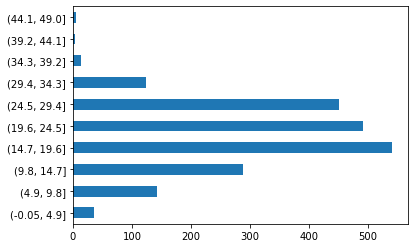

In [7]:
dataset.value.value_counts(sort=False,bins=10).plot(kind='barh')

## Treatment 1

Creating symbols

In [227]:
from sympy import Sum
mu, pi, sigma, s_i, lamda, alpha, N, r, s, x, y, z = symbols('mu pi sigma s_i lamda alpha N r s x y z')
mu, pi, sigma, s_i, lamda, alpha, N, r, s, x, y, z 

Treatment 1 data exluding offers = 0 (zero doesn't work with the logs

In [151]:
no_zero = treatment1.query("value>0")

Trying to write the mean formula with symbols, its not going well...

In [232]:
(1/N)*Sum(log(s_i), (i, 1, n))

C:\Users\Alex\anaconda3\lib\site-packages\sympy\core\sympify.py:449: SymPyDeprecationWarning: 

String fallback in sympify has been deprecated since SymPy 1.6. Use
sympify(str(obj)) or sympy.core.sympify.converter or obj._sympy_
instead. See https://github.com/sympy/sympy/issues/18066 for more
info.

  SymPyDeprecationWarning(


SympifyError: Sympify of expression 'could not parse '<bound method DataFrame.count of        id  treatment  tofrom  value  role  resp  round  rounds  old0       1          1       6   20.0     0     1      1       2    01       1          1       9   20.0     0     0      1       2    02       1          1      10   20.0     0     1      1       2    03       1          1      11   20.0     0     1      1       2    04       1          1      13   20.0     0     1      1       2    0...   ...        ...     ...    ...   ...   ...    ...     ...  ...1892  247          1     253   25.0     0     1      2       2    21893  247          1     255   25.0     0     1      2       2    21894  247          1     256   30.0     0     1      2       2    21895  247          1     258   27.0     0     1      2       2    21896  247          1     254   20.0     0     1      2       2    2[768 rows x 9 columns]>'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

### Fitting data into lognormal distribution using MLE

Finding the mean

In [180]:
x=no_zero.value
y=np.log(x)
m = (1/(len(x)))*y.sum()
print(m)
mean = np.exp(m)
print(mean)


2.9193719179548485
18.529645666382816


Finding std and var (This is still questionable. I took the log of n (len(x)) as well which I have no idea if legal? If I dont take log we get a tiny std and var. May be just an issue with using logs that I dont know how to resolve).

In [181]:
z = (y-m)**2
var =(1/np.log(len(x)))*z.sum()
# not needed? var = np.exp(v)
std = np.sqrt(var)
print(var)
print(std)

26.5451249351592
5.152196127396472


pdf of log norm distn

In [182]:
pdf = (1/(x*std*np.sqrt(2*np.pi)))*np.exp(-z/(2*var))
print(pdf)

0       0.003871
1       0.003871
2       0.003871
3       0.003871
4       0.003871
          ...   
1892    0.003092
1893    0.003092
1894    0.002570
1895    0.002860
1896    0.003871
Name: value, Length: 766, dtype: float64


Dont really know what I am doing anymore

(array([ 94., 249., 188., 104.,  14.,  55.,   7.,   8.,   8.,   0.,   5.,
          0.,  26.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([0.00155234, 0.00262559, 0.00369885, 0.0047721 , 0.00584536,
        0.00691861, 0.00799186, 0.00906512, 0.01013837, 0.01121163,
        0.01228488, 0.01335814, 0.01443139, 0.01550465, 0.0165779 ,
        0.01765116, 0.01872441, 0.01979767, 0.02087092, 0.02194418,
        0.02301743, 0.02409069, 0.02516394, 0.02623719, 0.02731045,
        0.0283837 , 0.02945696, 0.03053021, 0.03160347, 0.03267672,
        0.03374998, 0.03482323, 0.03589649, 0.03696974, 0.038043  ,
        0.03911625, 0.04018951, 0.04126276, 0.04233602, 0.04340927,
        0.04448252, 0.04555578, 0.04662903, 0.

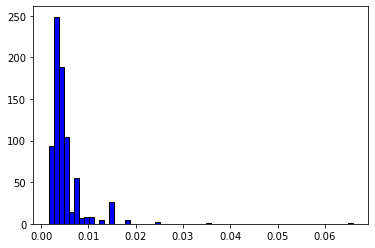

In [196]:
plt.hist(pdf, color = 'blue', edgecolor = 'black',
         bins = int(180/3))

In [152]:
no_zero.describe()

,id,treatment,tofrom,value,role,resp,round,rounds,old
count,766.000000,766.0,766.000000,766.000000,766.0,766.000000,766.000000,766.000000,766.00000
mean,121.328982,1.0,131.954308,20.326084,0.0,0.778068,1.648825,2.291123,0.85248
std,84.457106,0.0,88.389892,7.512386,0.0,0.415817,0.651327,0.454577,0.70695
min,1.000000,1.0,6.000000,1.000000,0.0,0.000000,1.000000,2.000000,0.00000
25%,22.500000,1.0,26.250000,15.000000,0.0,1.000000,1.000000,2.000000,0.00000
50%,137.000000,1.0,149.000000,20.000000,0.0,1.000000,2.000000,2.000000,1.00000
75%,162.000000,1.0,177.000000,25.000000,0.0,1.000000,2.000000,3.000000,1.00000
max,250.000000,1.0,274.000000,49.000000,0.0,1.000000,3.000000,3.000000,2.00000


<AxesSubplot:>

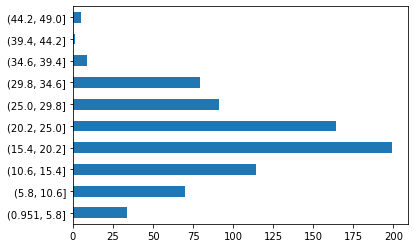

In [153]:
no_zero.value.value_counts(sort=False,bins=10).plot(kind='barh')

In [55]:
subset1.value.describe()

count    422.000000
mean      20.284550
std        6.608621
min        4.200000
25%       15.000000
50%       20.000000
75%       25.000000
max       45.000000
Name: value, dtype: float64

<AxesSubplot:>

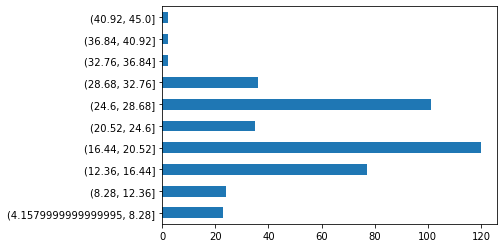

In [114]:
subset1.value.value_counts(sort=False,bins=10).plot(kind='barh')

## Treatment 2

<AxesSubplot:>

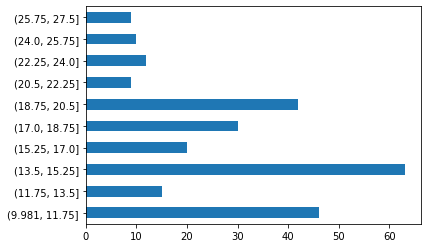

In [34]:
treatment2.value.value_counts(sort=False,bins=10).plot(kind='barh')

<AxesSubplot:>

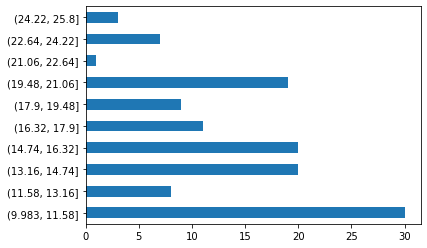

In [51]:
subset2.value.value_counts(sort=False,bins=10).plot(kind='barh')

## Treatment 3

<AxesSubplot:>

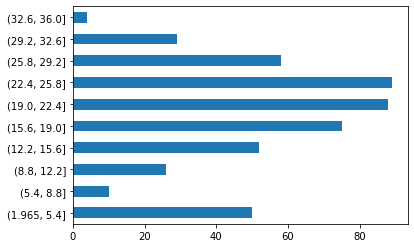

In [35]:
treatment3.value.value_counts(sort=False,bins=10).plot(kind='barh')

<AxesSubplot:>

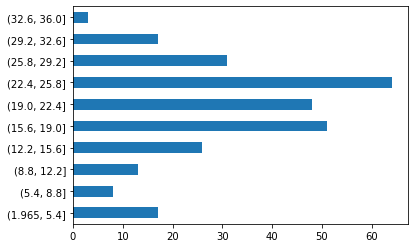

In [52]:
subset3.value.value_counts(sort=False,bins=10).plot(kind='barh')

## Treatment 4

<AxesSubplot:>

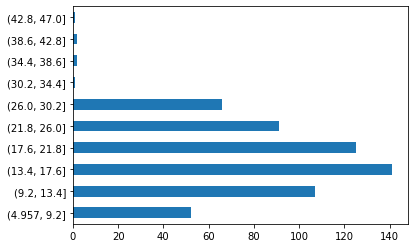

In [36]:
treatment4.value.value_counts(sort=False,bins=10).plot(kind='barh')

<AxesSubplot:>

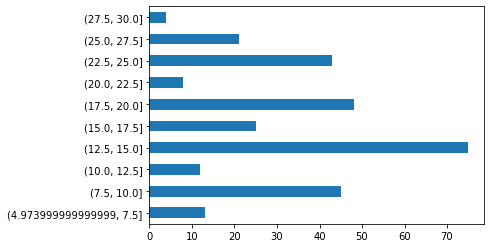

In [53]:
subset4.value.value_counts(sort=False,bins=10).plot(kind='barh')

In [57]:
import sympy

The last few counts and the bar chart indicate how widespread the offers are.  We want some kind of model that explains this dispersion.  There are many ways to do it.  The approach here uses loss aversion as the primary determinate.   We could have used a kind of variable altruism and spite.  So most of the experiments involved imposing lower limits on acceptable offers to induce a shift in the offers and acceptance probabilities in our model that wouldn't happen if altruisim and its counterpart, spite, were the only factors at play. 

A proposer and responder share a monetary payoff of size 1. The proposer offers some 
share of the payoff to the responder.  If the responder accepts, the responder gets
her share, the proposer gets the rest.  If the responder rejects, neither of them
get anything.


The model uses loss aversion  with an endogenous reference point as well as
other regarding preferences.
In the simplest version of loss aversion, the payoff is piecwise linear in money, and depends on a reference offer $r$. This is called constant loss aversion and comes from (Tversky and Kahnman 1991). 

Thinking of $x$ as the share of the payoff a player receives, this payoff would look like:
$$
U(x,\lambda,r)=\begin{cases}
x-r & if\;x\geq r\\
\lambda(x-r) & if\;x<r
\end{cases}
$$
Notice when the share is 0, the formula says the payoff to the responder is $-\lambda r$.

The term $\lambda\ge1$ is the degree of loss
aversion. The variable $\lambda$ which measures loss aversion is assumed privately known. It is common belief that it is independently drawn for each proposer and responder from distribution
$G$ which is assumed to have a compact support bounded below by $1$.  


This won't be quite enough to fit the data, so we'll add other regarding preferences. This consists of a spitefulness term when the other player gets a larger share, and a competitiveness term when the other other player gets a smaller share. To keep things simple, we'll assume the spitefulness term comes as a fixed cost. Alternatively the competitiveness term is a linear function as follows:
$$
V\left(x,y,\lambda,r\right)=\begin{cases}
x-r-\frac{1}{2} & 0\le x<y;x\ge r\\
\lambda\left(x-r\right)-\frac{1}{2} & 0<x<y;x<r\\
x-r+\alpha\left(x-y\right) & x\ge y;x\ge r\\
-\lambda r & x=y=0.
\end{cases}
$$

In this formula, $r$ is the reference offer and $\alpha$ is a positive constant. The reference offer
is the highest share a proposer believes he or she can get for sure.
For the responder, this will be the lowest offer she expects to receive
with positive probability. 

Ideally, we would like to recover the distribution $G$, the reference offer for proposers and responders, along with the constant $\alpha$ measuring the competitiveness term from the data on offers and responses.


Let $Q\left(s\right)$ be the probability with which a proposer expects
an offer of $s$ to a responder to be accepted.  The proposer is intent on maximizing
$$
Q\left(s\right)\left(\left(1-s\right)+\alpha\left(1-2s\right)\right)-\left(1-Q\left(s\right)\right)\left(\lambda r\right).\label{proposer-payoff-1}
$$

Now each player must make a decision, for the proposer the offer, which will depend on his or her loss aversion $\lambda$.  For the responder
the decision is about what offers to accept and which to reject.  Again, this depends on her loss aversion parameter $\lambda$.



An equilibrium consists of a pair of functions $o(\lambda)$ which gives an offer to be made by a seller that depends on his type $\lambda$ and $a(\lambda)$ which denotes the lowest offer that is acceptable to a responser of type $\lambda$. 
First notice that whatever the responder's reference offer happens
to be, she will accept an offer $s<\frac{1}{2}$ as long as
$$
s-r-\frac{1}{2}\ge-\lambda r.
$$
which is the same as the condition 
$$
\lambda \ge \frac{r-s+\frac{1}{2}}{r}
$$

From the proposer's prespective, the probability that an offer $s\ge r$ will the accepted is equal to 
$$
\mathbb{Pr}  \left\{ \lambda \ge \frac{r-s+\frac{1}{2}}{r} \right\} = 
$$

$$
\int_{\frac{r-s+\frac{1}{2}}{r}}^{\overline{\lambda}}dG(\tilde{s})=
$$

$$
1-G(\frac{r-s+\frac{1}{2}}{r}) = Q(s)
$$
A similar calculation for $s<r$ gives the acceptance probability 
$$
Q(s) = 1-G(\frac{1}{2s}).
$$

As the acceptance probability already builds in the fact that a responder uses a best reply, an equilibrium is now described by an offer function $o(\lambda)$
 which satisfies
 $$
 Q\left(o(\lambda)\right)\left(\left(1-o(\lambda)\right)-r+\alpha\left(1-2o(\lambda)\right)\right)-\left(1-Q\left(o(\lambda)\right)\right)\left(\lambda r\right)
 \\
 \ge Q\left(s\right)\left(\left(1-s\right)-r+\alpha\left(1-2s\right)\right)-\left(1-Q\left(s\right)\right)\left(\lambda r\right)
 $$
 for all $\lambda\ge 1$. 

There is no interaction between proposer types, each type solves what appears to be a completely separate maximization problem.  This leads to the following somewhat intutive approach to the equilibrium.

For the most part, the equilibrium is straightforward. The function
$Q\left(s,r\right)$ defines a kind of budget set that determines
what $\left(\tilde{Q},\tilde{s}\right)$ pairs are attainable for
the proposer. 

We can add the assumption that the proposer's reference point is the lowest offer that is accepted for sure, $\frac{1}{2}$. The proposer then chooses a $\left(\tilde{Q},\tilde{s}\right)$
pair that maximizes 
\begin{equation}
\tilde{Q}\left(1-\tilde{s}\left(1+2\alpha\right)+\alpha-\frac{1}{2}\right)+\left(1-\tilde{Q}\right)\left(-\lambda\frac{1}{2}\right)\label{surplus}
\end{equation}
 subject to $Q\left(\tilde{s},r\right)=\tilde{Q}$.


If we can find the function $o(s)$  that maximizes the proposer's expected payoff for each $s$, then we need to check whether the minimum point of this function, which occurs where $\lambda = 1$ coincides with the reference point $r$  we used to construct the $Q$ function which is a fixed point problem.

One approach to 'solving' this problem is to take the derivative of the payoff function given above for the proposer with respect to $\lambda$, then solving the corresponding differential equation.  We'll leave that approach for a different problem, because there is a simpler way here.

To understand the equilibrium just note the solution to each proposer's problem occurs where the level sets of the function above are tangent to the 'budget line' defined by the probabilitiy of acceptance function as in the following figure.


![equilibrium](mike_fig7.jpg)

The slope of an iso-surplus curve can be found by totally differentiating
the proposer's payoff with respect to $\tilde{s}$ and $\tilde{Q}$, then
setting the result to $0$ and solving for $\frac{d\tilde{Q}}{d\tilde{s}^{\prime}}$.
The result is
$$
I^{\prime}\left(\tilde{s},\tilde{Q},\lambda\right)=\frac{\tilde{Q}\left(1+2\alpha\right)}{\left\{ \left(1-\tilde{s}\left(1+2\alpha\right)+\alpha\right)+\frac{1}{2}\left(\lambda-1\right)\right\} }
$$
which is increasing in $\tilde{s}$ and $\tilde{Q}$ but falling in
$\lambda$. In this formula
$$
I\left(\tilde{s},\tilde{Q},\lambda:K\right)\equiv
\left\{ \tilde{Q}:\tilde{Q}\cdot\left(1-\tilde{s}\left(1+2\alpha\right)+\alpha-\frac{1}{2}\right)+\left(1-Q^{\prime}\right)\left(-\lambda\frac{1}{2}\right)=K\right\} .
$$


Now we write the first order condition by setting the slope of this iso-surplus line equal to the slope of the function that defines the probability of acceptance

$$
\frac{Q(s)\left(1+2\alpha\right)} { \left( 1-s\left(1+2\alpha\right)+\alpha\right) + \frac{1}{2} \left(\lambda-1\right) }
= Q^\prime(s)
$$


Now we can just solve this for $\lambda$ to get

$$
\lambda = \frac{2Q(s)(1+2\alpha)}{Q^\prime(s)} - 2(1-s(1+2\alpha)) + 1 
$$

The function above, call it $\lambda(s)$, gives the type of a proposer who makes an offer $s$. Let $\psi(s)$ be the empirical distribution of offers made by the proposers - i.e,
the proportion of all offers that are less than or equal to $s$. Whatever the unknown distribution of loss aversion parameters is, it should have the property that the proportion of proposers who make offers less than $s$ is equal to the proportion of proposers who have loss aversion parameters less than $\lambda(s)$, or

$$
\psi(s) = \hat{G}\left(\frac{2Q(s)(1+2\alpha)}{Q^\prime(s)} - 2(1-s(1+2\alpha)) + 1\right)
$$
where $\hat{G}(\lambda)$ is the unknown distribution of loss parameters.

Observe that in this expression, the function $Q(s)$ depends on $\hat{G}$.  So in a theoretical sense we have to solve a functional equation.  Also note, that this functional equation depends on $\alpha$, which is the competitiveness term in the payoff function.  So at this point, we can't tell what $\hat{G}$ is without knowing $\alpha$.

However, we have another bit of information. The probability that an offer $s$ is accepted is given by the probability with which a responder has a loss aversion parameter larger than 
$$
\frac{r-s+\frac{1}{2}}{r}.
$$
From the data from the experiment, we can estimate the probability $\hat{Q}(s)$  with which each offer is accepted.  So for each $s$,
$$
\hat{Q}(s) = 1-\hat{G}\left(\frac{r-s+\frac{1}{2}}{r}\right)
$$

Then since the function $\hat{G}$  is completely determined by this last operation, the solution to our original problem reduced from finding the solution to a functional equation, to finding the right parameter $\alpha$.